# Rainfall Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df=pd.read_csv(r"C:\Users\Pranay Salkar\Downloads\Wheather-Data.csv")
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [3]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [4]:
df.shape

(142193, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


Describe-
* Count- Are not equal there are missing values
* In max value there is too difference


In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [10]:
df=df.drop('Evaporation', axis = 'columns')
df=df.drop('Sunshine', axis = 'columns')
df=df.drop('WindGustDir', axis = 'columns')
df=df.drop('WindGustSpeed', axis = 'columns')
df=df.drop('WindDir9am', axis = 'columns')
df=df.drop('Pressure9am', axis = 'columns')
df=df.drop('Pressure3pm', axis = 'columns')
df=df.drop('Cloud9am', axis = 'columns')
df=df.drop('Cloud3pm', axis = 'columns')

Droping this because right know is not that much useful

In [11]:
df.isnull().sum()

Date               0
Location           0
MinTemp          637
MaxTemp          322
Rainfall        1406
WindDir3pm      3778
WindSpeed9am    1348
WindSpeed3pm    2630
Humidity9am     1774
Humidity3pm     3610
Temp9am          904
Temp3pm         2726
RainToday       1406
RISK_MM            0
RainTomorrow       0
dtype: int64

In [12]:
#checking the count of unique
[(col,df[col].nunique()) for col in df.columns]

[('Date', 3436),
 ('Location', 49),
 ('MinTemp', 389),
 ('MaxTemp', 505),
 ('Rainfall', 679),
 ('WindDir3pm', 16),
 ('WindSpeed9am', 43),
 ('WindSpeed3pm', 44),
 ('Humidity9am', 101),
 ('Humidity3pm', 101),
 ('Temp9am', 440),
 ('Temp3pm', 500),
 ('RainToday', 2),
 ('RISK_MM', 681),
 ('RainTomorrow', 2)]

In [13]:
#filling null values 
df["WindDir3pm"].fillna("SE", inplace = True)
df["RainToday"].fillna("NO", inplace = True)

In [14]:
df["Rain_Tomorrow"] = df["RainTomorrow"]
df=df.drop('RainTomorrow', axis = 'columns')

In [15]:
df.isnull().sum()

Date                0
Location            0
MinTemp           637
MaxTemp           322
Rainfall         1406
WindDir3pm          0
WindSpeed9am     1348
WindSpeed3pm     2630
Humidity9am      1774
Humidity3pm      3610
Temp9am           904
Temp3pm          2726
RainToday           0
RISK_MM             0
Rain_Tomorrow       0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["WindDir3pm"] = le.fit_transform(df["WindDir3pm"])
df["RainToday"] = le.fit_transform(df["RainToday"])
df["Rain_Tomorrow"] = le.fit_transform(df["Rain_Tomorrow"])
df["Location"] = le.fit_transform(df["Location"])

In [17]:
# filing null values with mean values
df = df.fillna(value = df['MinTemp'].mean())
df = df.fillna(value = df['MaxTemp'].mean())
df = df.fillna(value = df['Rainfall'].mean())
df = df.fillna(value = df['WindSpeed3pm'].mean())
df = df.fillna(value = df['WindSpeed9am'].mean())
df = df.fillna(value = df['Humidity9am'].mean())
df = df.fillna(value = df['Humidity3pm'].mean())
df = df.fillna(value = df['Temp9am'].mean())
df = df.fillna(value = df['Temp3pm'].mean())

In [18]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
Rain_Tomorrow    0
dtype: int64

### Data Visualization 

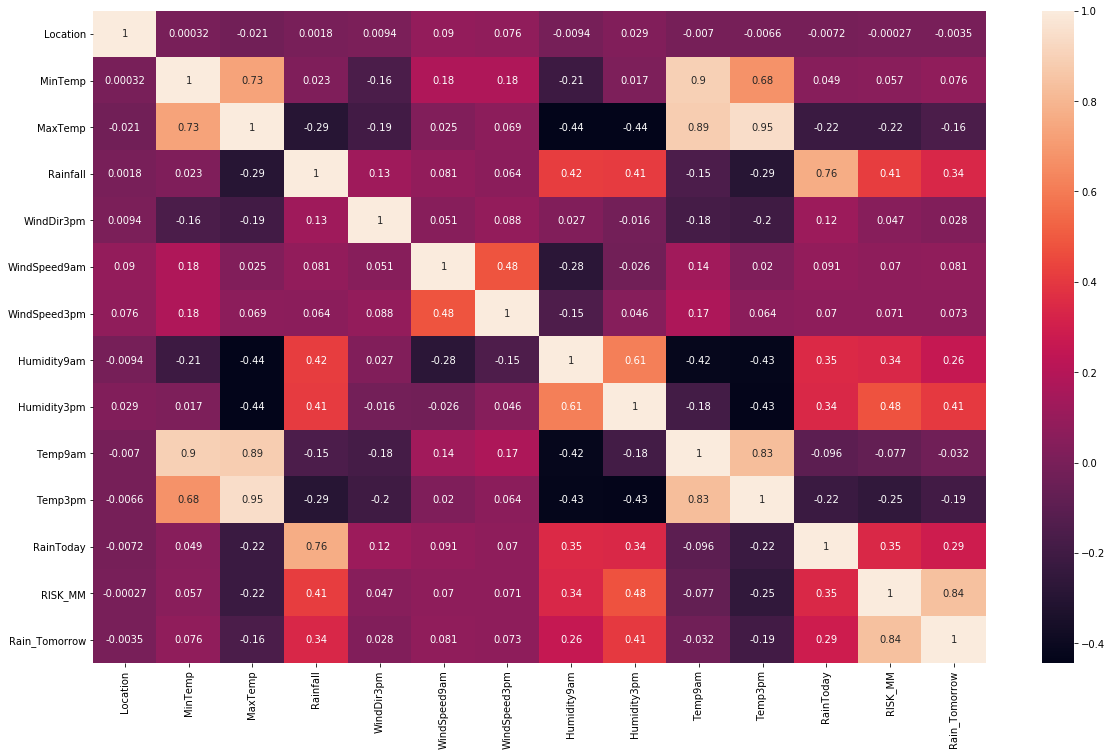

In [19]:
corrmat = df.corr(method="spearman")
plt.figure(figsize=(20, 12))

# Plot heat map
g = sns.heatmap(corrmat, annot=True)

# Rotate the y-axis labels for better readability
g.set_yticklabels(g.get_yticklabels(), rotation=0)

plt.show()


#### After seeing this heatmap, the darker color of relation column are less important.

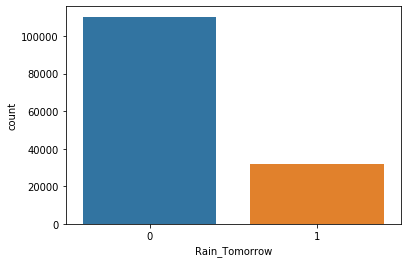

In [20]:
sns.countplot(df['Rain_Tomorrow'])

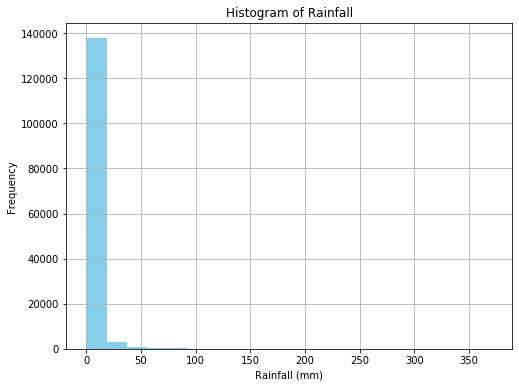

In [21]:
import matplotlib.pyplot as plt

# Plotting histogram of rainfall
plt.figure(figsize=(8, 6))
plt.hist(df['Rainfall'].dropna(), bins=20, color='skyblue')
plt.title('Histogram of Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


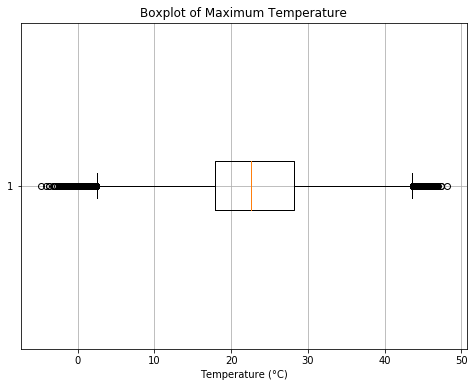

In [22]:
# Plotting boxplot of maximum temperature
plt.figure(figsize=(8, 6))
plt.boxplot(df['MaxTemp'].dropna(), vert=False)
plt.title('Boxplot of Maximum Temperature')
plt.xlabel('Temperature (°C)')
plt.grid(True)
plt.show()

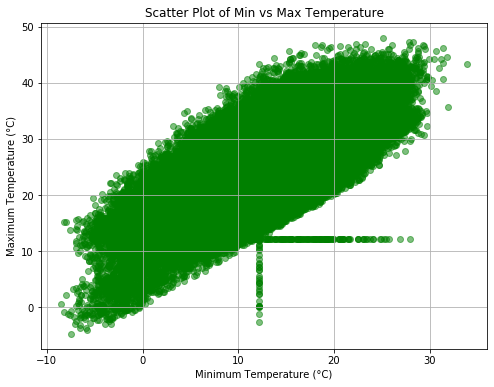

In [23]:
# Plotting scatter plot of minimum vs maximum temperature
plt.figure(figsize=(8, 6))
plt.scatter(df['MinTemp'], df['MaxTemp'], color='green', alpha=0.5)
plt.title('Scatter Plot of Min vs Max Temperature')
plt.xlabel('Minimum Temperature (°C)')
plt.ylabel('Maximum Temperature (°C)')
plt.grid(True)
plt.show()


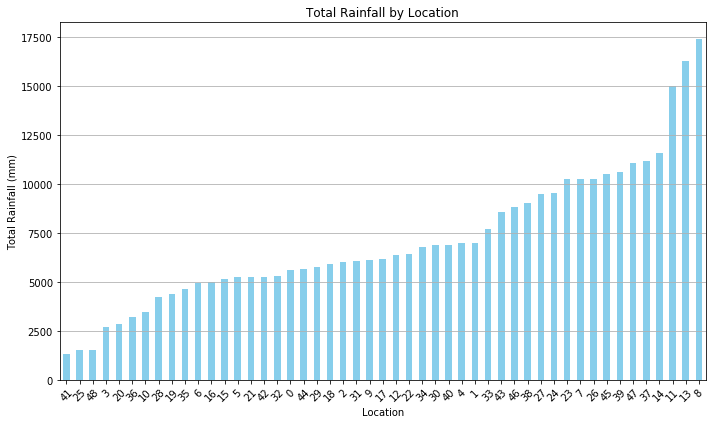

In [24]:
# Group the data by location and calculate total rainfall
total_rainfall = df.groupby('Location')['Rainfall'].sum().sort_values()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
total_rainfall.plot(kind='bar', color='skyblue')
plt.title('Total Rainfall by Location')
plt.xlabel('Location')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### After visualization, performing Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics

In [26]:
X = df.drop(['Rain_Tomorrow', 'Date'], axis=1)
Y = df['Rain_Tomorrow']

In [27]:
from imblearn.over_sampling import RandomOverSampler
rs = RandomOverSampler(random_state=0)
X_res, Y_res = rs.fit_resample(X, Y)
print('original dataset shape %s' %Counter(Y))
print('After oversampling dataset shape %s' %Counter(Y_res))

original dataset shape Counter({0: 110316, 1: 31877})
After oversampling dataset shape Counter({0: 110316, 1: 110316})


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size=0.2, random_state=11)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(176505, 13) (176505,)
(44127, 13) (44127,)


In [29]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data
# Use the same scaler to transform the test data (no fitting)
X_test = scaler.transform(X_test)


## Building multple models

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

classifier = LogisticRegression()

# Train the model
classifier.fit(X_train, Y_train)

# Make predictions
Y_pred = classifier.predict(X_test)

# Print predicted values
print(Y_pred)


[1 0 1 ... 1 0 1]


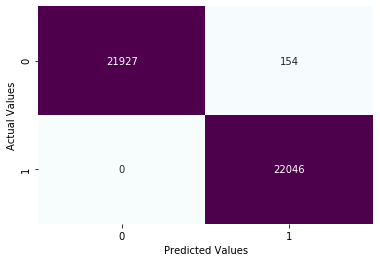

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     22081
           1       0.99      1.00      1.00     22046

    accuracy                           1.00     44127
   macro avg       1.00      1.00      1.00     44127
weighted avg       1.00      1.00      1.00     44127

Accuracy of the model:  0.9965100731978154


In [31]:
cfm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Print classification report
print("Classification report:")
print(classification_report(Y_test, Y_pred))

# Calculate and print accuracy
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, accuracy_score

# Select features based on importance scores
feature_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
X_train_selected = feature_selector.fit_transform(X_train, Y_train)
X_test_selected = feature_selector.transform(X_test)

# Initialize Random Forest classifier with increased regularization
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Train the model
rf_classifier.fit(X_train_selected, Y_train)

# Make predictions
Y_pred_rf = rf_classifier.predict(X_test_selected)


In [33]:
print("Random Forest Classification report:")
print(classification_report(Y_test, Y_pred_rf))

# Calculate and print accuracy
acc_rf = accuracy_score(Y_test, Y_pred_rf)
print("Accuracy of the Random Forest model: ", acc_rf)

Random Forest Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22081
           1       1.00      1.00      1.00     22046

    accuracy                           1.00     44127
   macro avg       1.00      1.00      1.00     44127
weighted avg       1.00      1.00      1.00     44127

Accuracy of the Random Forest model:  1.0


## Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
# Make predictions
Y_pred_dt = dt_classifier.predict(X_test)

print("Decision Tree Classification report:")
print(classification_report(Y_test, Y_pred_dt))

acc_dt = accuracy_score(Y_test, Y_pred_dt)
print("Accuracy of the Decision Tree model: ", acc_dt)


Decision Tree Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22081
           1       1.00      1.00      1.00     22046

    accuracy                           1.00     44127
   macro avg       1.00      1.00      1.00     44127
weighted avg       1.00      1.00      1.00     44127

Accuracy of the Decision Tree model:  1.0


In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

[]

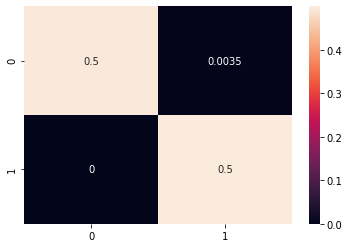

In [37]:
y_pred = xgb.predict(X_test)
score5 = accuracy_score(Y_test, Y_pred)
cn = confusion_matrix(Y_test, Y_pred)
ax = plt.subplot()
sns.heatmap(cn / np.sum(cn), annot = True, ax=ax)
plt.plot()

In [38]:
print('Acccuracy of logistic regression : ',score5)
print(classification_report(Y_test,Y_pred))

Acccuracy of logistic regression :  0.9965100731978154
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     22081
           1       0.99      1.00      1.00     22046

    accuracy                           1.00     44127
   macro avg       1.00      1.00      1.00     44127
weighted avg       1.00      1.00      1.00     44127



## KNN- K Neareast Neighbor

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='euclidean')

model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)

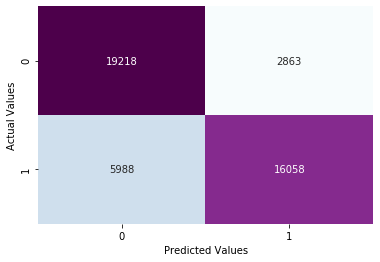

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81     22081
           1       0.85      0.73      0.78     22046

    accuracy                           0.80     44127
   macro avg       0.81      0.80      0.80     44127
weighted avg       0.81      0.80      0.80     44127

Accuracy of the model:  0.7994198563237926


In [40]:
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

### Conclusion - After perfoming different models I got best accuracy in KNN model -79%